### So the reason why I wrote this code and went through all this trouble is so that we wouldn't need to take the average amount paid per shares over the course of the forecasted time period. Instead we can use a regression model to forecast the dividend. But if and only if there is a correlation between the dividend amount/yield and the years over time. We can use the covariance function to see if there is a strong negative or positive covariance to determine if the values are directly related to each other.

### Because this is supposed to be adaptable, if you think that sometimes the trend isn't exactly a linear one, you can copy and paste the code from the polynomial testing labeled and create a polynomial regression fit instead of a linear regression model. However, you will have to populate the inputs into a list using a for loop.

My train of thought for this code was to apply this regression model to predict the dividend earned from the stock and continue compounding that into the crypto. 

Now I just need to work on the ARIMA model for the crypto and multiply the percent change in the forecast prices of the crypto or the cumulative sum with dividend received from the stock.

In [167]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [168]:
def convertMonthsToPercentages(announced_years):
    years_percentage = []
    
    
#     for x in (announced_years):
#         month = x[0:2].replace("/"," ")
#         time_period = 0
#         year = int(x[-4:])
#         percentage = int(month)/12
#         years_percentage.append(year+percentage)

    for x in range(len(announced_years)):
        years_percentage.append(x/4)
#         print(years_percentage)
        
    return years_percentage[::-1]
        

In [169]:
msft_div = pd.read_csv(Path("./Resources/msft_dividends.csv"))


msft_div.loc[:, "Yield"]= msft_div.loc[:, "Yield"].str.replace("%", "")
msft_div.loc[:, "Yield"]= msft_div.loc[:, "Yield"].astype("float")

msft_div.loc[:, "Amount"]= msft_div.loc[:, "Amount"].str.replace("$", "")
msft_div.loc[:, "Amount"]= msft_div.loc[:, "Amount"].astype("float")

Years_Announced = []
for x in range(len(msft_div.index)):
    Years_Announced.append(str(msft_div["Announced "][x]))

msft_div.dtypes

<ipython-input-169-9ffda42871a0>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  msft_div.loc[:, "Amount"]= msft_div.loc[:, "Amount"].str.replace("$", "")


Announced        object
Period           object
Amount          float64
Yield           float64
Ex-Dividend      object
Record Date      object
Payable Date     object
dtype: object

In [206]:
name = f'{msft_div=}'.split('=')[0]

In [170]:
msft_div["Percent Year"] = (convertMonthsToPercentages(Years_Announced))

# for x in (Years_Announced):
#     month = x[0:2].replace("/"," ")
#     percentage = int(month)/12
#     print(x, "     ", percentage)
#msft_div.iloc[:,0] = pd.to_datetime(msft_div.iloc[:,0])
msft_div

,Announced,Period,Amount,Yield,Ex-Dividend,Record Date,Payable Date,Percent Year
0,9/14/2021,quarterly,0.62,0.83,11/17/2021,11/18/2021,12/9/2021,5.75
1,6/16/2021,quarterly,0.56,0.87,8/18/2021,8/19/2021,9/9/2021,5.50
2,3/16/2021,quarterly,0.56,0.94,5/19/2021,5/20/2021,6/10/2021,5.25
3,12/2/2020,quarterly,0.56,1.04,2/17/2021,2/18/2021,3/11/2021,5.00
4,9/15/2020,quarterly,0.56,1.07,11/18/2020,11/19/2020,12/10/2020,4.75
5,6/17/2020,quarterly,0.51,1.05,8/19/2020,8/20/2020,9/10/2020,4.50
6,3/9/2020,quarterly,0.51,1.35,5/20/2020,5/21/2020,6/11/2020,4.25
7,12/4/2019,quarterly,0.51,1.36,2/19/2020,2/20/2020,3/12/2020,4.00
8,9/18/2019,quarterly,0.51,1.47,11/20/2019,11/21/2019,12/12/2019,3.75
9,6/12/2019,Quarterly,0.46,1.39,8/14/2019,8/15/2019,9/12/2019,3.50


In [293]:
print("Covariance Percent Year and Amount: " + str(msft_div["Percent Year"].astype("float").cov(msft_div["Amount"].astype("float"))))
print("Covariance Percent Year and Yield: " + str(msft_div["Percent Year"].astype("float").cov(msft_div["Yield"].astype("float"))))
#covariance is positive, establishing that there is a relative positive linear relationship



Covariance Percent Year and Amount: 0.13076086956521743
Covariance Percent Year and Yield: -1.1205434782608696


24

Okay, so this took me a long time so I am logging this to keep track of my thought process. Everything before was pretty self explanatory.

I am creating a linear regression forecast to extrapolate the future dividend yields and amounts. The first block of code below is the setting the model for the amount.


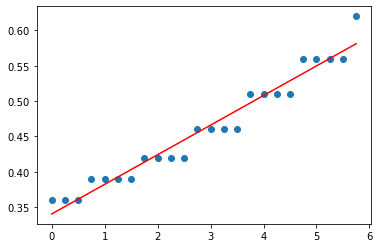

The slope is:  0.04184347826086957 
The intercept is:  0.34053333333333335
The predicted amount paid by msft_div per share by 25.0 years is $ 1.376 .
The predicted total dividend amount paid by msft_div 19.0 years after the current year is $ 74.77 .


In [340]:
x_amount = msft_div.iloc[:,7].values.reshape(-1,1)
y_amount = msft_div.iloc[:,2].values.reshape(-1,1)

amount_regression = LinearRegression().fit(x_amount,y_amount)
yfit_amount = amount_regression.predict(x_amount)

plt.scatter(x_amount, y_amount)
plt.plot(x_amount, yfit_amount, color='red')
plt.show()

#squeeze turns from x and y from numpy arrays into a list by removing excess levels
amount_regression.coef_ = np.squeeze(amount_regression.coef_)
amount_regression.intercept_ = np.squeeze(amount_regression.intercept_)
print("The slope is: ", amount_regression.coef_, "\nThe intercept is: ", amount_regression.intercept_)

#you forecast the future quarterlies through this loop and populate this list by how much quarterlies ahead you are plotting.
amount_forecast = []
#keep track of how much years are in the forecasted time with amount_years
amount_years = 0
for i in range(100):
    amount_forecast.append( round((amount_regression.coef_ * (0.25*i)) + amount_regression.intercept_  , 3) )
    amount_years=i
    amount_years/=4

#the first line gives the predicted dividend at the end of the forecasted time period
print(f"The predicted quarterly amount paid by {name} per share by", amount_years+0.25, "years is $", (amount_forecast[-1]), ".")
#the second line provides the total dividend given through the years, minusing 2015-2021 time frame
print(f"The predicted total dividend amount paid by {name}", (amount_years+0.25) - (len(msft_div.index)/4), "years after the current year is $", round(sum(amount_forecast[len(msft_div.index):]),2), ".")




In [341]:
temp_list = list(msft_div["Amount"])
temp_list.reverse()

#yearly_div is the total yearly amount paid from 2015-2021
#forecast_yearly_div is the predicted yearly amount from 2015-the end of the forecast period

forecast_yearly_div = np.add.reduceat(amount_forecast, np.arange(0, len(amount_forecast), 4)).tolist()
yearly_div = np.add.reduceat(temp_list, np.arange(0, len(temp_list), 4)).tolist()


# Now for this code, I also used the regression model. As you can see, it looks optimistic. But the problem is that if the line continues, then it will eventually reach 0 and negative and clearly, that is not possible for dividend rate! Therefore, I will use a polynomial function??

## advice from andy that came from the future cells: pls dont look any further this is fools errand

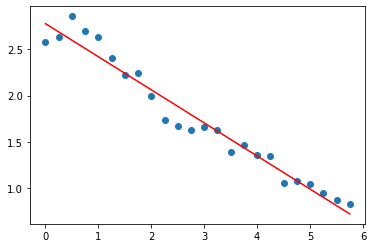

The slope is:  -0.3585739130434782 
The intercept is:  2.7800666666666665


In [346]:
x_yield = msft_div.iloc[:,7].values.reshape(-1,1)
y_yield = msft_div.iloc[:,3].values.reshape(-1,1)

yield_regression = LinearRegression().fit(x_yield,y_yield)
yfit_yield = yield_regression.predict(x_yield)

plt.scatter(x_yield, y_yield)
plt.plot(x_yield, yfit_yield, color='red')
plt.show()

yield_regression.coef_ = np.squeeze(yield_regression.coef_)
yield_regression.intercept_ = np.squeeze(yield_regression.intercept_)
print("The slope is: ", yield_regression.coef_, "\nThe intercept is: ", yield_regression.intercept_)


------------------
polynomial testing starts now

--------------------------------------------------


## Conclusion: do not forecast the yield. It is a fool's errand and I am the fool. Please abort. I spent 2 days working on this before realizing yield is not reliant on the time period and is instead calculated from the amount paid instead. The variables are not related. Even if they were, the fitted equation is clearly an asymptote because we are assuming the possibility that the dividend yield will never hit 0. The idea that a stock is paying out dividends infinitismally close to 0% seems laughable.
↓ ↓ ↓ ↓
## Though it can hit 0 when the company is declaring it won't provide dividend anymore but predicting when exactly that will happened based off of the yields historic data is not plausible.

In [347]:
from sklearn.preprocessing import PolynomialFeatures

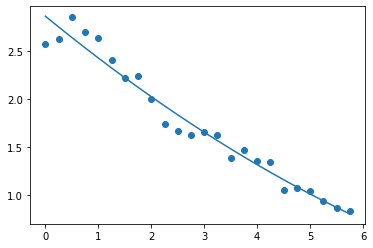

In [350]:
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(x_yield)
pr.fit(X_poly, y_yield)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_yield)
plt.scatter(x_yield, y_yield)
plt.plot(x_yield, lin_reg.predict(pr.fit_transform(x_yield)))
plt.show()

In [356]:
lin_reg.predict(pr.fit_transform([[14]]))
#still can return negatives

array([[-0.2767903]])

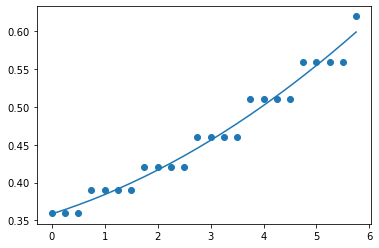

In [385]:
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(x_amount)
pr.fit(X_poly, y_amount)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_amount)
plt.scatter(x_yield, y_amount)
plt.plot(x_amount, lin_reg.predict(pr.fit_transform(x_amount)))
plt.show()

In [386]:
for i in range(24):
    print(lin_reg.predict(pr.fit_transform([[i]])))

[[0.35854615]]
[[0.38415673]]
[[0.41660222]]
[[0.45588261]]
[[0.5019979]]
[[0.5549481]]
[[0.6147332]]
[[0.68135321]]
[[0.75480812]]
[[0.83509793]]
[[0.92222265]]
[[1.01618227]]
[[1.1169768]]
[[1.22460623]]
[[1.33907057]]
[[1.46036981]]
[[1.58850395]]
[[1.723473]]
[[1.86527695]]
[[2.01391581]]
[[2.16938957]]
[[2.33169824]]
[[2.50084181]]
[[2.67682028]]


In [383]:
from scipy.optimize import curve_fit
import numpy as np
# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b


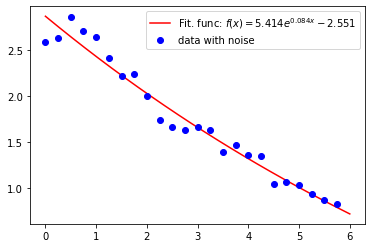

In [384]:
# x_yield = x_yield[:,0].astype(float)
# y_yield = y_yield[:,0].astype(float)
p0 = (1,1.e-1,1)
opt, pcov = curve_fit(model_func, x_yield, y_yield, p0)
a,k,b = opt

x2 = np.linspace(0,6,24)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))
ax.plot(x_yield, y_yield, 'bo', label='data with noise')
ax.legend(loc='best')
plt.show()

numpy.ndarray